In [29]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import ExtraTreesRegressor
from utils import utils_gn, utils_sevsn, utils_noah, utils_models
import importlib
importlib.reload(utils_gn)
importlib.reload(utils_sevsn)
importlib.reload(utils_noah)
importlib.reload(utils_models)
warnings.filterwarnings('ignore')

In [30]:
# read the data
df_raw = (utils_gn.read_data('severson_all.pkl')).drop('cycle_life', axis=1).join(utils_gn.read_data('noah_all.pkl'))
df = df_raw.copy()
df.head()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
b1c0,-0.002873,-2.541602,0.000010,-5.014861,-0.008460,-2.072648,-0.532058,-0.274041,1.651688,0.217928,...,-0.005282,0.003144,-79.299389,-75.009448,-68.133388,11.166000,2.586119,0.000388,-0.000031,1851.0
b1c1,-0.004100,-2.387257,0.000010,-5.013960,-0.011004,-1.958457,-0.429375,-0.367163,1.970884,0.294661,...,0.001686,0.000501,-75.511329,-73.411862,-60.405989,15.105340,10.906407,0.000396,-0.000019,2159.0
b1c2,-0.004487,-2.348070,0.000018,-4.737000,-0.017216,-1.764058,-1.080194,0.033502,3.348637,0.524868,...,-0.005399,0.004043,-76.601709,-73.345940,-65.414446,11.187263,4.675725,0.000312,-0.000013,2236.0
b1c3,-0.007456,-2.127507,0.000036,-4.442613,-0.018961,-1.722149,-0.439050,-0.357486,1.904584,0.279800,...,-0.002219,0.012165,-80.446334,-67.731448,-55.749502,24.696832,-0.732940,0.000353,-0.000013,1433.0
b1c4,-0.005750,-2.240332,0.000023,-4.647744,-0.013958,-1.855177,-0.362548,-0.440634,1.666169,0.221719,...,0.002736,0.001597,-75.575598,-65.232594,-55.730088,19.845510,-0.840498,0.000347,-0.000030,1708.0


In [31]:
df.index

Index(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9',
       'b1c11',
       ...
       'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41', 'b3c42', 'b3c43',
       'b3c44', 'b3c45'],
      dtype='object', length=124)

In [32]:
df.columns

Index(['mean_Q_100_10', 'log_mean_Q_100_10', 'var_Q_100_10',
       'log_var_Q_100_10', 'min_Q_100_10', 'log_min_Q_100_10', 'skew_Q_100_10',
       'log_skew_Q_100_10', 'kurt_Q_100_10', 'log_kurt_Q_100_10',
       ...
       'dVdQpeak_maxmag_di_y_100m0', 'dVdQpeak_maxmag_di_y_diff',
       'dVdQpeak_maxarea_di_y_0', 'dVdQpeak_maxarea_di_y_50',
       'dVdQpeak_maxarea_di_y_100', 'dVdQpeak_maxarea_di_y_100m0',
       'dVdQpeak_maxarea_di_y_diff', 'dSOHdCycCyc1', 'dSOHdCycCyc100',
       'cycle_life'],
      dtype='object', length=245)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, b1c0 to b3c45
Columns: 245 entries, mean_Q_100_10 to cycle_life
dtypes: float64(245)
memory usage: 242.4+ KB


In [34]:
df.describe()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,-0.018901,-1.795793,0.000223,-3.835354,-0.040760,-1.440500,-0.103301,-0.777828,1.857125,0.261912,...,-0.000860,0.006225,-86.421878,-61.174991,-46.747626,40.011316,-11.308809,0.000265,-0.000069,807.241935
std,0.011347,0.270904,0.000262,0.411134,0.020373,0.217995,0.330102,0.425974,0.454478,0.067593,...,0.046542,0.046324,11.467643,12.863652,6.312352,9.989366,20.046688,0.000136,0.000137,364.359118
min,-0.077684,-3.105396,0.000010,-5.014861,-0.138026,-2.251053,-1.080194,-2.337813,1.612805,0.207582,...,-0.040421,-0.052170,-112.994264,-88.677648,-69.014721,0.491715,-85.815278,-0.000126,-0.001108,170.000000
25%,-0.024233,-1.950487,0.000077,-4.114970,-0.052091,-1.573442,-0.285918,-0.976312,1.710361,0.233088,...,-0.008152,-0.002622,-92.562247,-71.707141,-48.543997,36.915481,-26.371329,0.000190,-0.000065,525.750000
50%,-0.017671,-1.752752,0.000168,-3.775169,-0.038753,-1.411715,-0.141639,-0.713148,1.761561,0.245898,...,-0.005461,0.001079,-86.660594,-59.687399,-44.930027,41.479825,-6.326848,0.000246,-0.000038,743.000000
75%,-0.011208,-1.615590,0.000298,-3.526121,-0.026703,-1.283235,-0.001193,-0.472983,1.866319,0.270984,...,-0.002174,0.005336,-82.555981,-50.581414,-42.971080,46.361411,4.678101,0.000336,-0.000025,945.500000
max,0.000785,-1.109668,0.001875,-2.726901,-0.005610,-0.860038,1.986572,0.298104,5.920243,0.772340,...,0.491715,0.491715,0.491715,-21.537204,-30.971796,61.613879,23.552556,0.000990,0.000211,2236.000000


In [35]:
# prune cells with more than 1250 cycle life
df = df[df['cycle_life'] <= 1250]
df.index

Index(['b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16',
       'b1c17', 'b1c18',
       ...
       'b3c29', 'b3c30', 'b3c31', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41',
       'b3c43', 'b3c44'],
      dtype='object', length=113)

In [36]:
# define parameters for model pipeline
estimator = ExtraTreesRegressor()
param_grid = {"n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [2, 3, 4, 5],
            "min_samples_split": [2, 3, 4, 5]}
algo = utils_models.fit_tree_based_regression
fname = 'ext'
title = 'Extremely Randomized Trees'

0 features removed from a total of 244
0 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.83 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 17.037920899137017,
 'MAPE': 0.029844894252481068,
 'MSE': 575.3255049767635,
 'R2 score': 0.9873930215875361,
 'RMSE': 23.985943904227813}
Test:
{'MAE': 55.19559833786965,
 'MAPE': 0.08098698184895337,
 'MSE': 4702.093734823784,
 'R2 score': 0.914076318203855,
 'RMSE': 68.57181443438539}


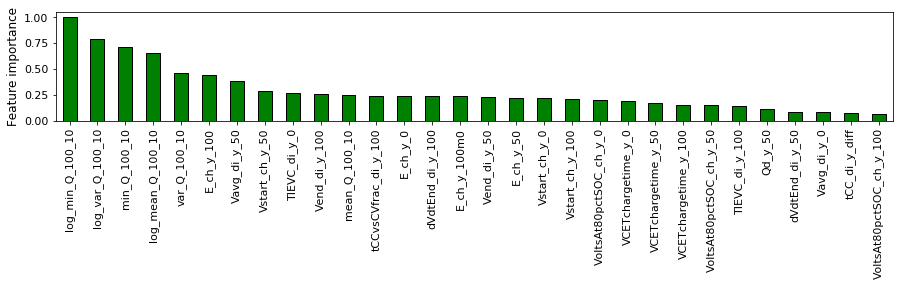

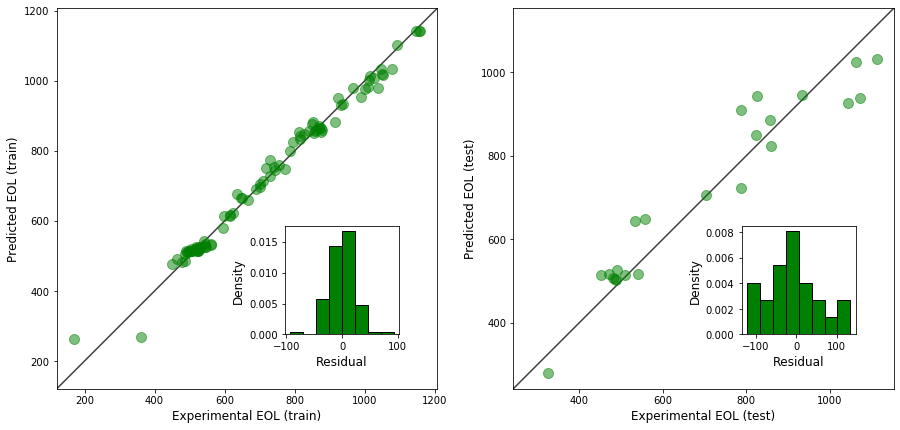

25 features removed from a total of 244
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.25 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 29.27908387267589,
 'MAPE': 0.045632647859668925,
 'MSE': 1402.6941235878776,
 'R2 score': 0.9692630791049727,
 'RMSE': 37.45255830497935}
Test:
{'MAE': 54.3523641995342,
 'MAPE': 0.07977804174810953,
 'MSE': 4696.937862004007,
 'R2 score': 0.9141705340150514,
 'RMSE': 68.53420942860585}


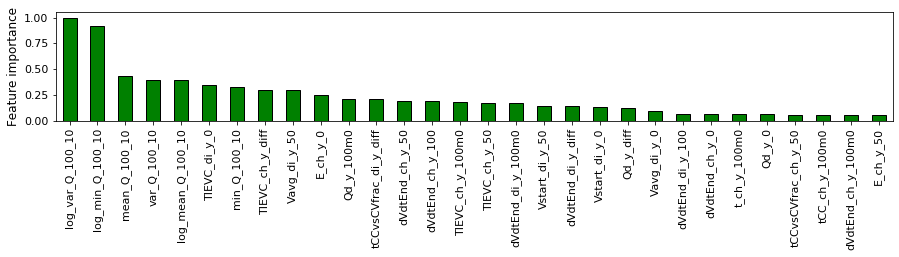

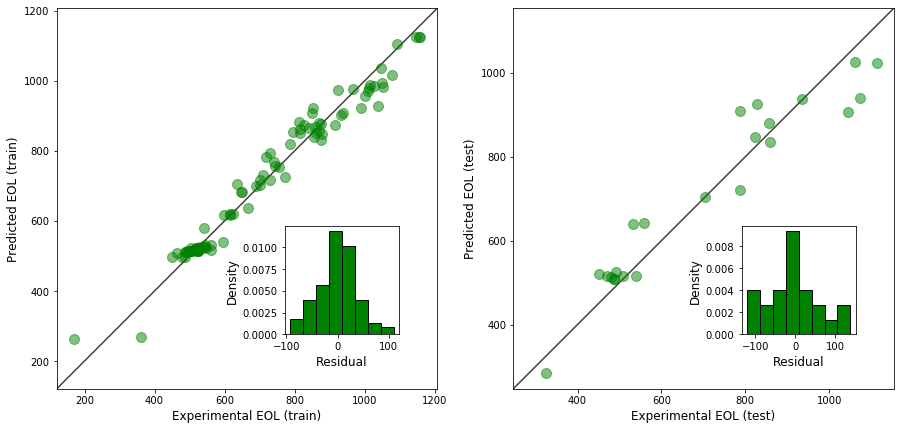

49 features removed from a total of 244
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.22 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 41.70301230253184,
 'MAPE': 0.061979900793767445,
 'MSE': 2736.811272646732,
 'R2 score': 0.9400288700313417,
 'RMSE': 52.314541693937564}
Test:
{'MAE': 60.98700683794054,
 'MAPE': 0.08998026058322085,
 'MSE': 5713.300624912226,
 'R2 score': 0.8955980351337952,
 'RMSE': 75.58637856725394}


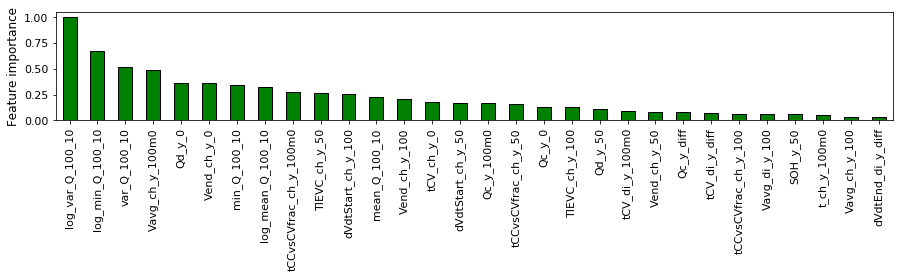

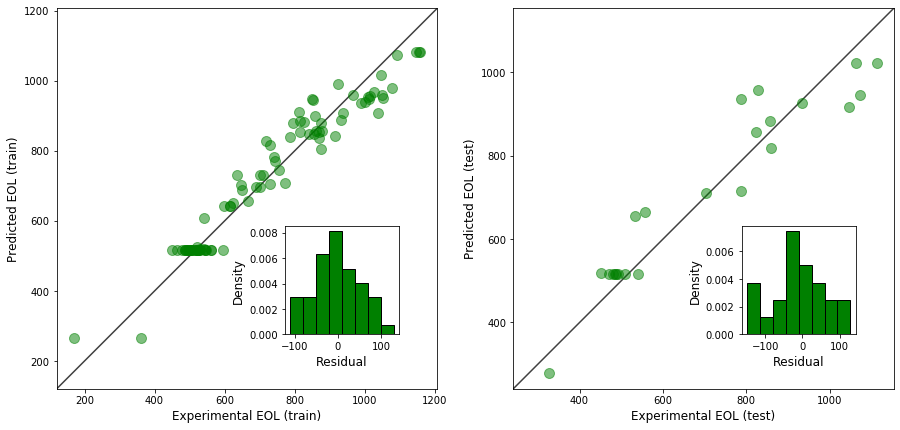

74 features removed from a total of 244
74 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.27 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 17.070957402661623,
 'MAPE': 0.029884778951711002,
 'MSE': 582.241663227746,
 'R2 score': 0.9872414693670746,
 'RMSE': 24.129684275343223}
Test:
{'MAE': 50.156190004989405,
 'MAPE': 0.07528551042455944,
 'MSE': 3839.659011297138,
 'R2 score': 0.9298360139762804,
 'RMSE': 61.9649821374713}


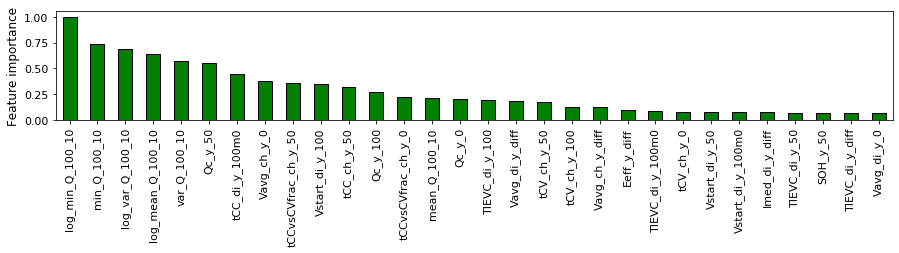

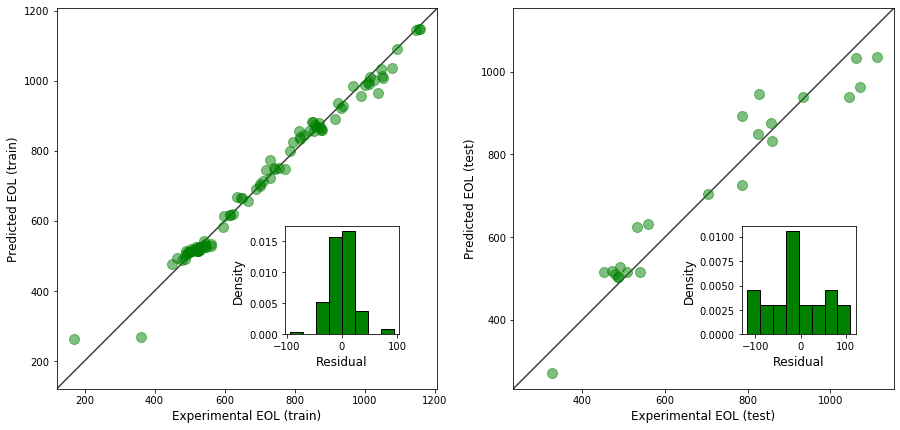

98 features removed from a total of 244
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.4 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 18.42764037141288,
 'MAPE': 0.031571214092492646,
 'MSE': 646.5018513002523,
 'R2 score': 0.9858333503165492,
 'RMSE': 25.426400675287336}
Test:
{'MAE': 50.80539246774197,
 'MAPE': 0.07549615787358008,
 'MSE': 3902.7154251791762,
 'R2 score': 0.9286837529735954,
 'RMSE': 62.471717002009605}


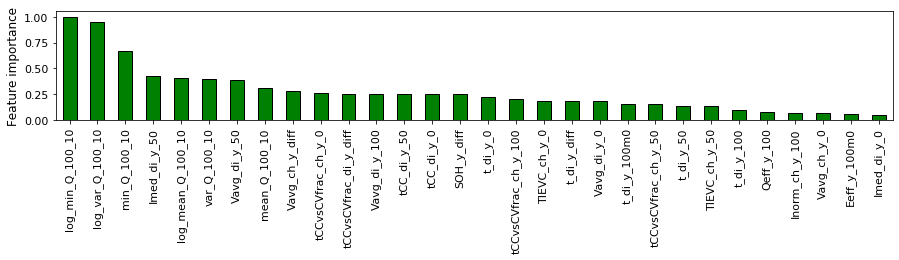

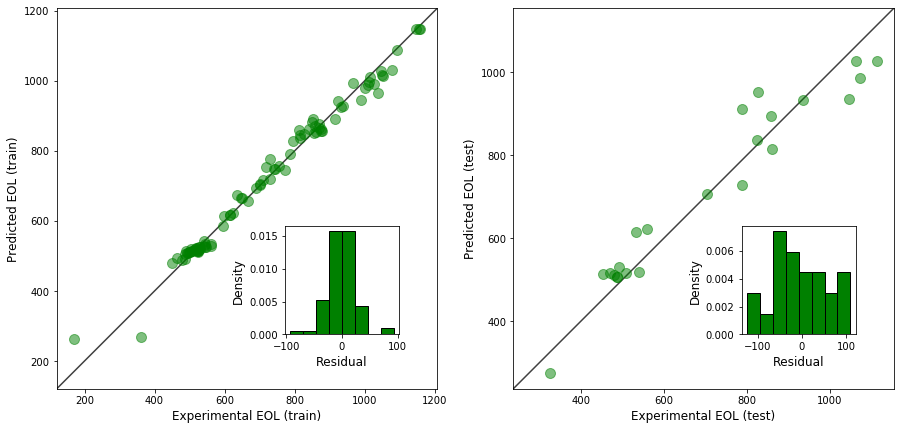

122 features removed from a total of 244
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.24 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 32.01551136759583,
 'MAPE': 0.048884372535408886,
 'MSE': 1686.0715534457888,
 'R2 score': 0.963053493209867,
 'RMSE': 41.06180163419268}
Test:
{'MAE': 52.303537168211186,
 'MAPE': 0.07726806724354543,
 'MSE': 4137.438202371085,
 'R2 score': 0.9243945477056573,
 'RMSE': 64.32292128293837}


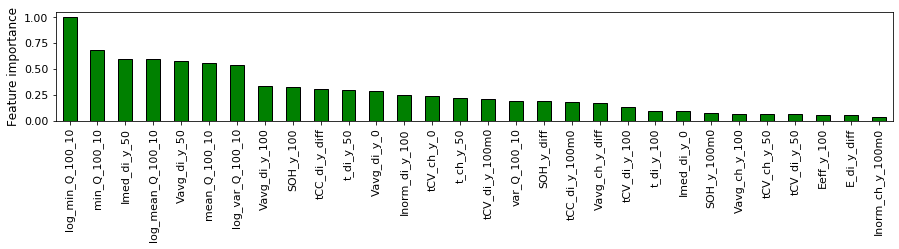

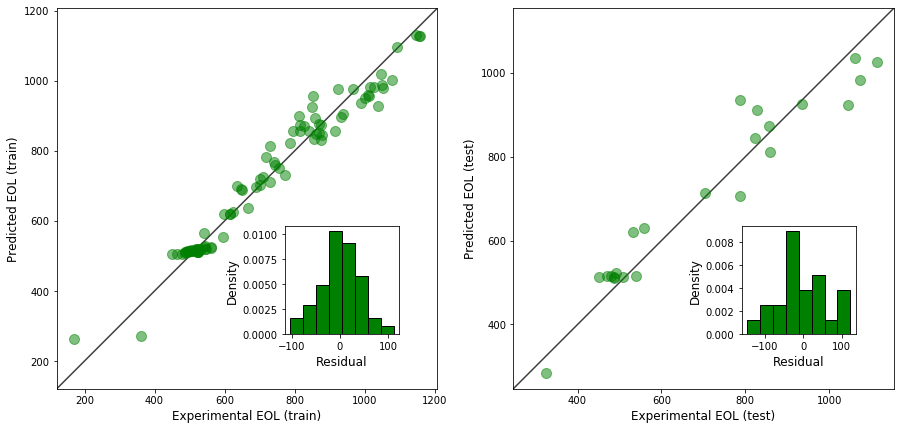

147 features removed from a total of 244
147 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.64 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 18.912382469015068,
 'MAPE': 0.03226636089249413,
 'MSE': 686.4580110201084,
 'R2 score': 0.9849577999738722,
 'RMSE': 26.200343719503156}
Test:
{'MAE': 48.11599570582672,
 'MAPE': 0.07106050987541349,
 'MSE': 3524.7840933183556,
 'R2 score': 0.9355898789104531,
 'RMSE': 59.369892145079355}


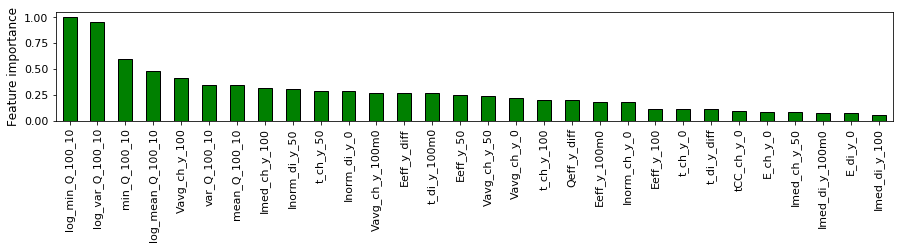

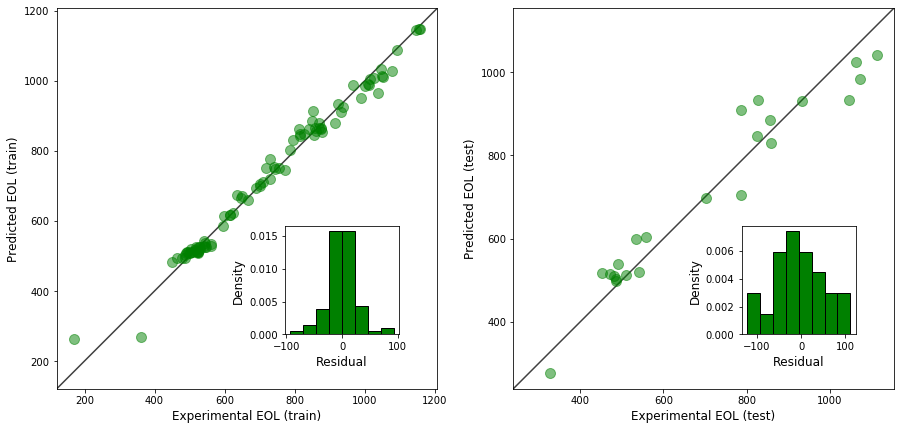

171 features removed from a total of 244
171 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.22 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 31.833898288987253,
 'MAPE': 0.048542956738117926,
 'MSE': 1680.8516540852434,
 'R2 score': 0.9631678756907137,
 'RMSE': 40.998190863564254}
Test:
{'MAE': 53.43635063310883,
 'MAPE': 0.07873487377069127,
 'MSE': 4417.453899624383,
 'R2 score': 0.9192776825333343,
 'RMSE': 66.46392931225465}


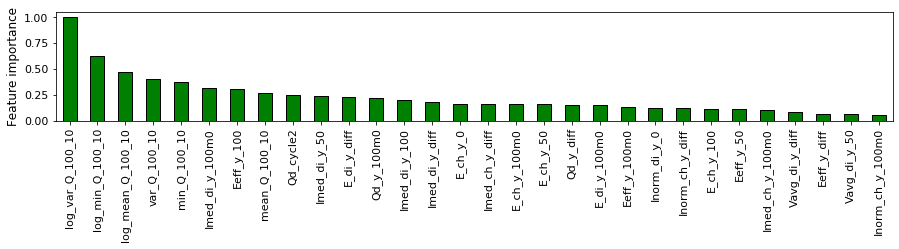

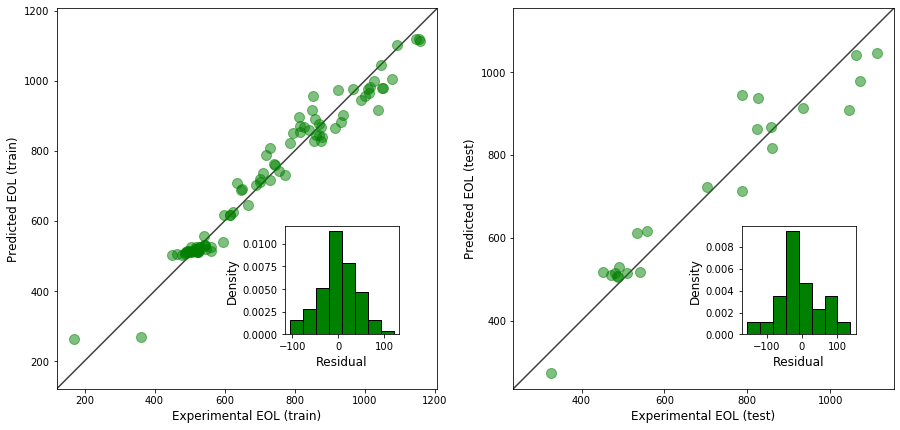

196 features removed from a total of 244
196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.2 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 33.59978607044614,
 'MAPE': 0.050747125686829514,
 'MSE': 1891.3987035823916,
 'R2 score': 0.9585542055424978,
 'RMSE': 43.49021388292304}
Test:
{'MAE': 51.629614595585124,
 'MAPE': 0.07394925942371526,
 'MSE': 4651.636451348436,
 'R2 score': 0.9149983490722584,
 'RMSE': 68.20290647288014}


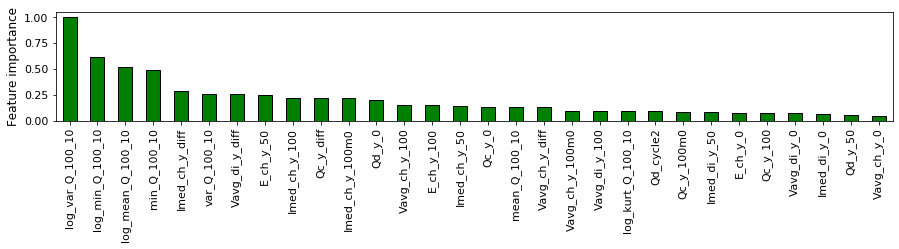

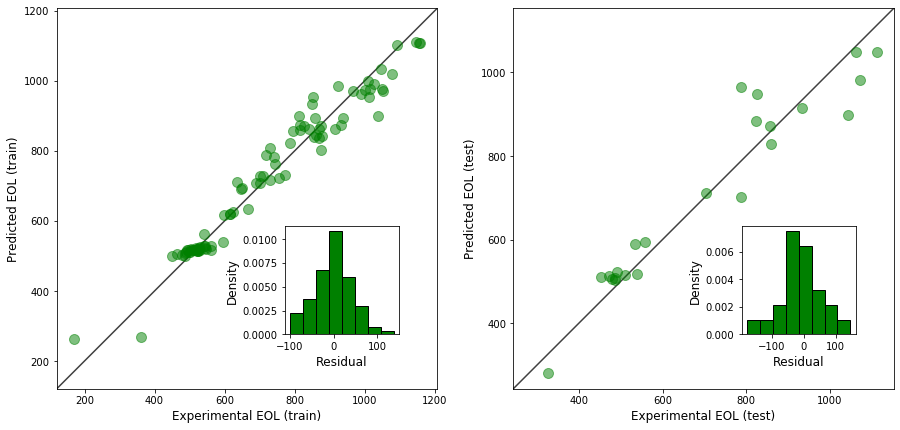

In [37]:
# call the model pipeline function
best_k, best_param, metrics = utils_models.model_pipeline(df=df,
                                                          algo=algo,
                                                          estimator=estimator,
                                                          param_grid=param_grid,
                                                          fname=fname,
                                                          title=title,
                                                          model_type='ext')

In [38]:
best_k

0.4

In [39]:
best_param

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 400}

In [40]:
metrics

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score
Features used,,,,,,,,,,
1.0,17.037921,0.029845,575.325505,23.985944,0.987393,55.195598,0.080987,4702.093735,68.571814,0.914076
0.9,29.279084,0.045633,1402.694124,37.452558,0.969263,54.352364,0.079778,4696.937862,68.534209,0.914171
0.8,41.703012,0.061980,2736.811273,52.314542,0.940029,60.987007,0.089980,5713.300625,75.586379,0.895598
0.7,17.070957,0.029885,582.241663,24.129684,0.987241,50.156190,0.075286,3839.659011,61.964982,0.929836
0.6,18.427640,0.031571,646.501851,25.426401,0.985833,50.805392,0.075496,3902.715425,62.471717,0.928684
0.5,32.015511,0.048884,1686.071553,41.061802,0.963053,52.303537,0.077268,4137.438202,64.322921,0.924395
0.4,18.912382,0.032266,686.458011,26.200344,0.984958,48.115996,0.071061,3524.784093,59.369892,0.935590
0.3,31.833898,0.048543,1680.851654,40.998191,0.963168,53.436351,0.078735,4417.453900,66.463929,0.919278
0.2,33.599786,0.050747,1891.398704,43.490214,0.958554,51.629615,0.073949,4651.636451,68.202906,0.914998


### Perform $k$-Fold Repeated Cross-validation on the model with feature selection and best MAPE

In [41]:
model = ExtraTreesRegressor(**best_param)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=True,
                                            scaling=False,
                                            k=best_k)



147 features removed from a total of 244


{'test_MAE': (55.454561671182645, 9.425827493064244),
 'test_MAPE': (0.08616003020938134, 0.02686095208131241),
 'test_RMSE': (74.50668050713305, 14.068784774982824),
 'test_R2 score': (0.879207592870448, 0.041476195104732765)}